# part 1

In [2]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

Retreive the table data from given website

In [3]:
canada_data = pd.read_html(url)[0]
canada_data

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [4]:
data_assigned_borough = canada_data[canada_data['Neighbourhood'] != 'Not assigned']
data_assigned_borough

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


More than one neighborhood can exist in one postal code area. These rows will be combined into one row with the neighborhoods separated with a comma.

In [5]:
data_grouped = data_assigned_borough.groupby(['Postcode', 'Borough']).apply(lambda x: ','.join(x['Neighbourhood'])).reset_index()
data_grouped.columns = ['Postcode', 'Borough', 'Neighbourhood']
data_grouped

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie..."
101,M9V,Etobicoke,"Albion Gardens,Beaumond Heights,Humbergate,Jam..."


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.  
Check if there is any cell in this situation.

In [6]:
data_grouped[data_grouped['Neighbourhood'] == 'Not assigned']

,Postcode,Borough,Neighbourhood


We've found that there is no this kind of data needs to be removed. Therefore, this is our final data.

In [7]:
data_grouped.shape

(103, 3)

# part 2

In [8]:
geo_data = pd.read_csv('http://cocl.us/Geospatial_data')
geo_data.columns = ['Postcode', 'Latitude', 'Longitude']
geo_data.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Append the latitudes and longitudes to their corresponding postcodes.

In [9]:
data = pd.merge(data_grouped, geo_data, how='left')
data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


# part 3

Explore and cluster the neighborhoods in Toronto. I will work with only boroughs that contain the word Toronto.

In [10]:
toronto_data = data[data['Borough'].str.contains('Toronto')]
toronto_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [11]:
toronto_data.shape

(39, 5)

In [12]:
#!conda install -c conda-forge folium=0.5.0 --yes 

In [13]:
import folium # map rendering library
import requests # library to handle requests
import numpy as np

In [14]:
# create map of Toronto using latitude and longitude values
latitude = 43.70011
longitude = -79.4163
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto

In [15]:
# add markers to map
for postcode, borough, neighborhood, lat, lng in zip( toronto_data['Postcode'], toronto_data['Borough'], toronto_data['Neighbourhood'], toronto_data['Latitude'], toronto_data['Longitude']):
    label = '{}, {}'.format(neighborhood, borough, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Define Foursquare Credentials and Version

In [16]:
CLIENT_ID = 'H201PLIGMNTAP5ZKN2DZK1QSDVTSZNLH4SGVA0VBPFO00MFT' # your Foursquare ID
CLIENT_SECRET = 'JAPGNRKSTAJEQUKPATJJCNFETSEJQBAQRPDODZDNU1CN1MLP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H201PLIGMNTAP5ZKN2DZK1QSDVTSZNLH4SGVA0VBPFO00MFT
CLIENT_SECRET:JAPGNRKSTAJEQUKPATJJCNFETSEJQBAQRPDODZDNU1CN1MLP


Retreive the nearby venues of neighborhoods

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    LIMIT = 100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return nearby_venues

In [18]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvalles
Runnymede

In [19]:
print(toronto_venues.shape)
toronto_venues.head()

(1717, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
2,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
3,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


Let's check how many venues were returned for each neighborhood

In [20]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,55,55,55,55,55,55
"Brockton,Exhibition Place,Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",14,14,14,14,14,14
"Cabbagetown,St. James Town",48,48,48,48,48,48
Central Bay Street,82,82,82,82,82,82
"Chinatown,Grange Park,Kensington Market",85,85,85,85,85,85
Christie,18,18,18,18,18,18


In [21]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 238 uniques categories.


## Analyze each neighborhood

In [22]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
toronto_onehot.shape

(1717, 239)

let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [24]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide,King,Richmond",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,...,0.0,0.0,0.0,0.020000,0.0,0.0,0.01,0.0,0.01,0.0
1,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.018182,0.0,0.0,0.00,0.0,0.00,0.0
2,"Brockton,Exhibition Place,Parkdale Village",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.0
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.0,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.0


In [25]:
toronto_grouped.shape

(39, 239)

Let's print each neighborhood along with the top 10 most common venues

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Restaurant,Café,Bar,Thai Restaurant,Cosmetics Shop,Steakhouse,Sushi Restaurant,Gym,Asian Restaurant
1,Berczy Park,Coffee Shop,Farmers Market,Cocktail Bar,Beer Bar,Bakery,Seafood Restaurant,Restaurant,Cheese Shop,Café,Diner
2,"Brockton,Exhibition Place,Parkdale Village",Café,Coffee Shop,Breakfast Spot,Gym,Bakery,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant,Burrito Place
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Skate Park,Garden Center,Burrito Place,Fast Food Restaurant,Farmers Market,Auto Workshop,Spa,Garden,Restaurant
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Lounge,Boutique,Coffee Shop,Airport,Airport Food Court,Airport Gate,Airport Service,Airport Terminal,Bar,Harbor / Marina


## cluster neighborhoods

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

Lets examine the performance of different k. Since kmeans is a kind of unsupervised learning algorithm, we could use silhouetto score to measure the performance of clustering. It measures the distance between samples and other points in the same clusters, and the distance beween samples and other points in the next nearest clusters. The value of score ranges in [-1, 1]. The more it closes to 1, the better the model has. Reference: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [30]:
scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    labels = kmeans.labels_
    score = silhouette_score(toronto_grouped_clustering, labels, metric='euclidean')
    scores.append(score)

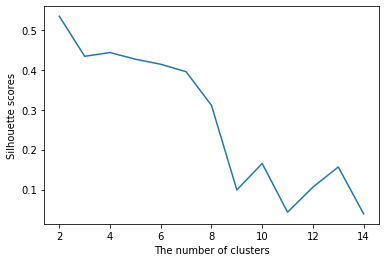

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = list(range(2, 15))
ax.plot(x, scores)
ax.set(xlabel='The number of clusters', ylabel='Silhouette scores')
plt.show()

According to the above graph, k = 2 gives the maximum score. So let choose the number of clusters as 2.

In [32]:
# set number of clusters
best_k = np.argmax(scores)+2
print(best_k)

# run k-means clustering
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(toronto_grouped_clustering)

2


In [33]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_data.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Pub,Other Great Outdoors,Neighborhood,Health Food Store,Trail,Yoga Studio,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Bookstore,Furniture / Home Store,Restaurant,Ice Cream Shop,Diner,Pub,Caribbean Restaurant
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,0,Park,Sandwich Place,Pizza Place,Gym,Board Shop,Brewery,Burrito Place,Pub,Movie Theater,Sushi Restaurant
43,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Bakery,Gastropub,Italian Restaurant,American Restaurant,Brewery,Yoga Studio,Latin American Restaurant,Fish Market
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Gym / Fitness Center,Park,Bus Line,Swim School,Yoga Studio,Dim Sum Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


Let's visualize the clusters

In [36]:
# create map
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(best_k)
ys = [i + x + (i*x)**2 for i in range(best_k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):   
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Eventually, only one neigbourhood appears in the minor cluster.  
Let's look at the neighborhood in the majar cluster. It seems most of neighborhoods have cafe, park, coffee shop, clothing shop nearby.

In [39]:
# Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,East Toronto,0,Pub,Other Great Outdoors,Neighborhood,Health Food Store,Trail,Yoga Studio,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
41,East Toronto,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Bookstore,Furniture / Home Store,Restaurant,Ice Cream Shop,Diner,Pub,Caribbean Restaurant
42,East Toronto,0,Park,Sandwich Place,Pizza Place,Gym,Board Shop,Brewery,Burrito Place,Pub,Movie Theater,Sushi Restaurant
43,East Toronto,0,Café,Coffee Shop,Bakery,Gastropub,Italian Restaurant,American Restaurant,Brewery,Yoga Studio,Latin American Restaurant,Fish Market
44,Central Toronto,0,Gym / Fitness Center,Park,Bus Line,Swim School,Yoga Studio,Dim Sum Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
45,Central Toronto,0,Gym,Hotel,Breakfast Spot,Food & Drink Shop,Sandwich Place,Department Store,Park,Cosmetics Shop,Concert Hall,Electronics Store
46,Central Toronto,0,Clothing Store,Coffee Shop,Café,Restaurant,Rental Car Location,Salon / Barbershop,Mexican Restaurant,Fast Food Restaurant,Chinese Restaurant,Diner
47,Central Toronto,0,Sandwich Place,Dessert Shop,Pizza Place,Gym,Italian Restaurant,Café,Coffee Shop,Sushi Restaurant,Costume Shop,Farmers Market
49,Central Toronto,0,Coffee Shop,Pub,Light Rail Station,American Restaurant,Supermarket,Bagel Shop,Restaurant,Fried Chicken Joint,Sports Bar,Sushi Restaurant
50,Downtown Toronto,0,Park,Trail,Playground,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Yoga Studio


If we look at the sample in the second cluster, this neighborhood has some venues that rarely appearing in the above table, such as Tennis Court, Yoga Studio.

In [40]:
# Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Central Toronto,1,Trail,Tennis Court,Yoga Studio,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
